In [3]:
import numpy as np 
import pandas as pd

In [7]:
df1 = pd.read_csv("C:\\Users\\aksha\\datasets\\movie recommendation\\tmdb_5000_credits.csv")
df2 = pd.read_csv("C:\\Users\\aksha\\datasets\\movie recommendation\\tmdb_5000_movies.csv")

In [10]:
df1.columns = ['id','tittle','cast','crew']
df2 = df2.merge(df1,on='id')

In [12]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
#Demographic Filtering 

In [14]:
C = df2['vote_average'].mean()
C

6.092171559442011

In [15]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [16]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 29)

In [18]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    #calculation based on the imbd formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
#by defining the new feature 'score' and calculate its value with 'weigh' 
#ted_rating()

In [20]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [21]:
#to sort the movies based on the score calculated above 
q_movies = q_movies.sort_values('score', ascending=False)


In [23]:
q_movies[['title','vote_count','score']].head(10)

,title,vote_count,score
1881,The Shawshank Redemption,8205,8.059258
662,Fight Club,9413,7.939256
65,The Dark Knight,12002,7.920020
3232,Pulp Fiction,8428,7.904645
96,Inception,13752,7.863239
3337,The Godfather,5893,7.851236
95,Interstellar,10867,7.809479
809,Forrest Gump,7927,7.803188
329,The Lord of the Rings: The Return of the King,8064,7.727243
1990,The Empire Strikes Back,5879,7.697884


In [24]:
""" The above is the most basic recommender. Under the Trending Now  tab 
of these systems we find movies that are very popular and they can just be
obtained by sorting the dataset by the popularity"""

' The above is the most basic recommender. Under the Trending Now  tab \nof these systems we find movies that are very popular and they can just be\nobtained by sorting the dataset by the popularity'

In [25]:
pop = df2.sort_values('popularity',ascending=False)

In [26]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Popular Movies')

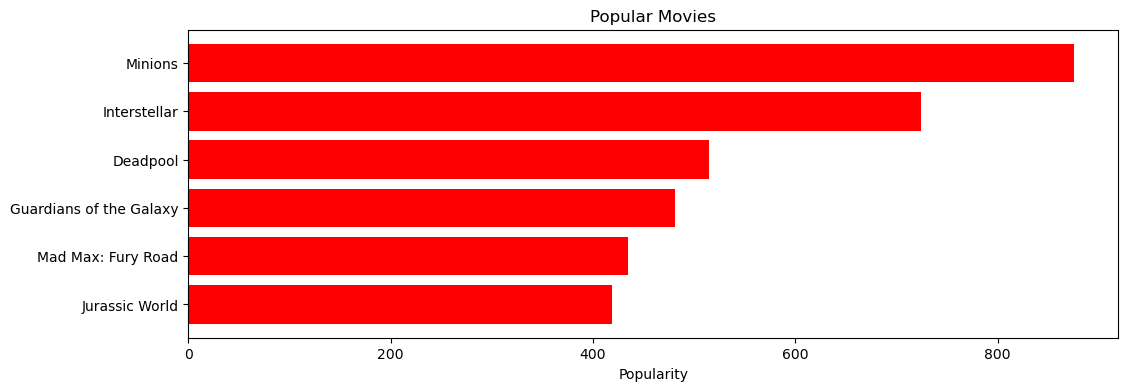

In [29]:
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6), pop['popularity'].head(6),align='center',color='red')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")